# How to Setup and Run Jenkins
> Jenkins is a specialised tool that is designed to provide software teams from all sorts of backgrounds with the necessary capabilities to build and refine their source code in the best possible way.

- toc: true
- badges: false
- comments: true
- categories: [CICD, MLOps]
- image:

## Introduction

Duration: 5

### What you'll learn?

Setup a Jenkins server to run the cicd pipelines

### Why is this important?

Important part of MLOps

### How it will work?

1. Go to Play-with-docker site
2. Pull the Jenkins docker
3. Run the container
4. Access Jenkins GUI and install plugins
5. Create a pipeline
6. Trigger the pipeline by pushing to git

### Who is this for?

1. People who are new to MLOps
2. People willing to improve CICD skills

<!---------------------------->

## Login to PWD

Duration: 5

We will use *Play with docker* for this tutorial. 

### Sign-in

Go to [this](https://labs.play-with-docker.com/) link and login. The landing page will look like this:



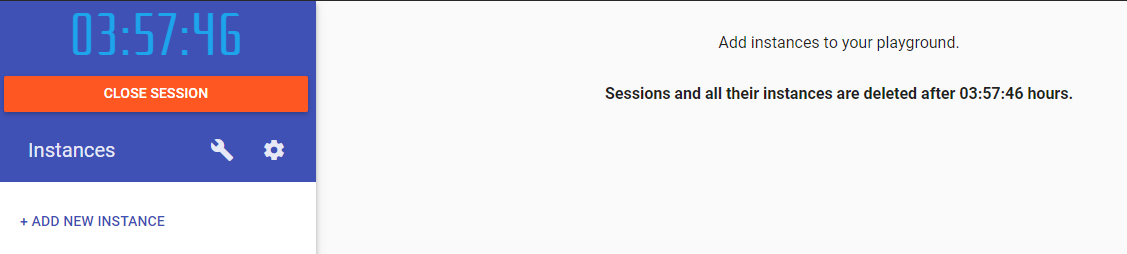

### Create an instance

Click on *ADD NEW INSTANCE*. After clicking, it will look like this:



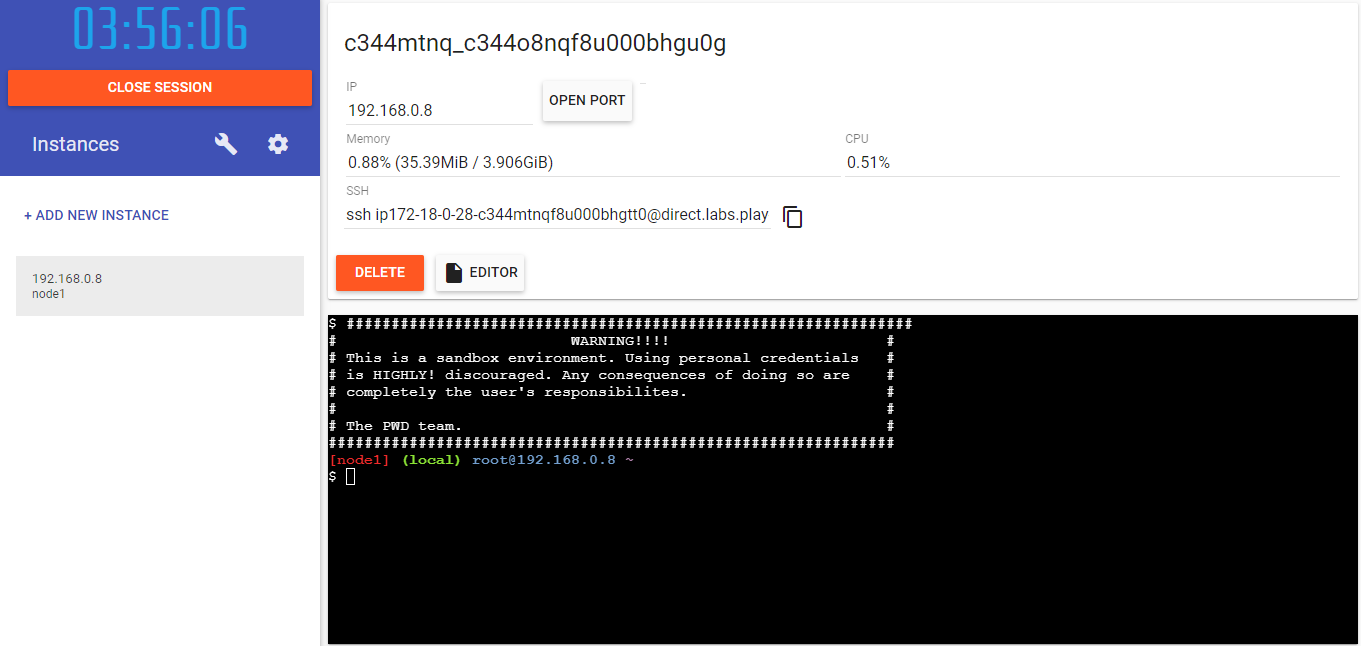

## Run Jenkins docker

Duration: 2

`docker run -p 8080:8080 -p 50000:50000 -d -v jenkins_home:/var/jenkins_home jenkins/jenkins:lts`

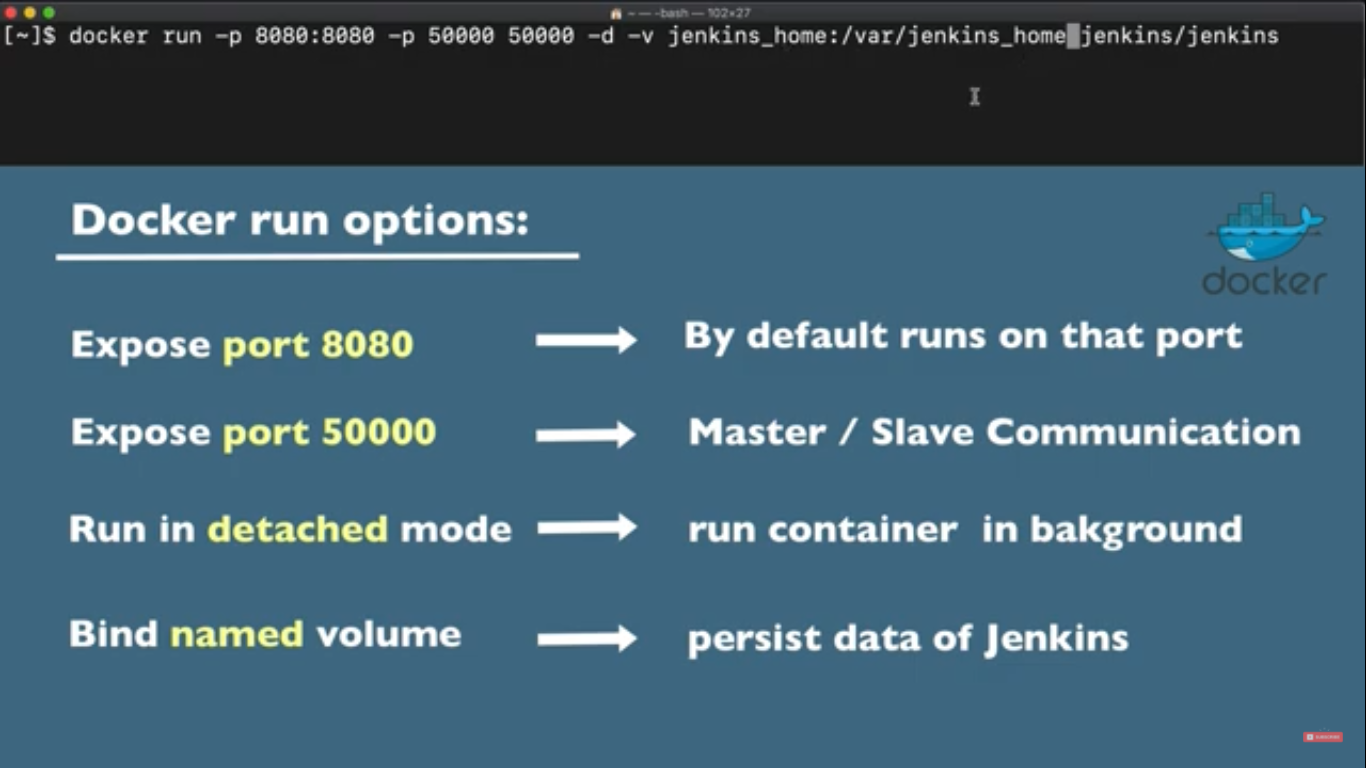

## Get Jenkins password

Duration: 2

Run `docker logs <container name>` and get the password



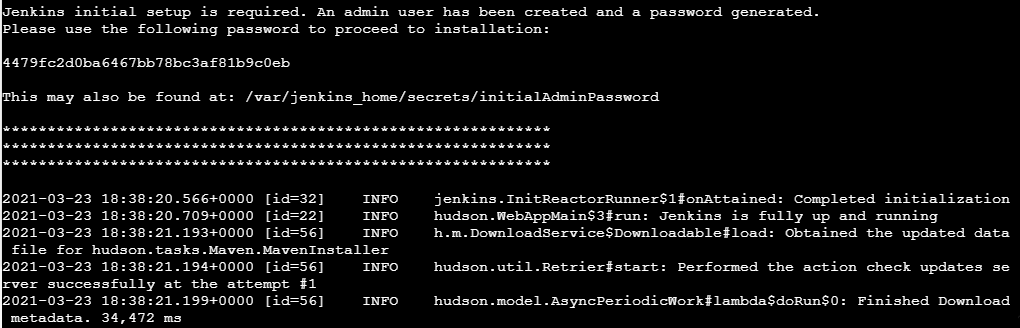

## Access Jenkins GUI

Duration: 2

Go to `localhost:8080` and paste the copied password



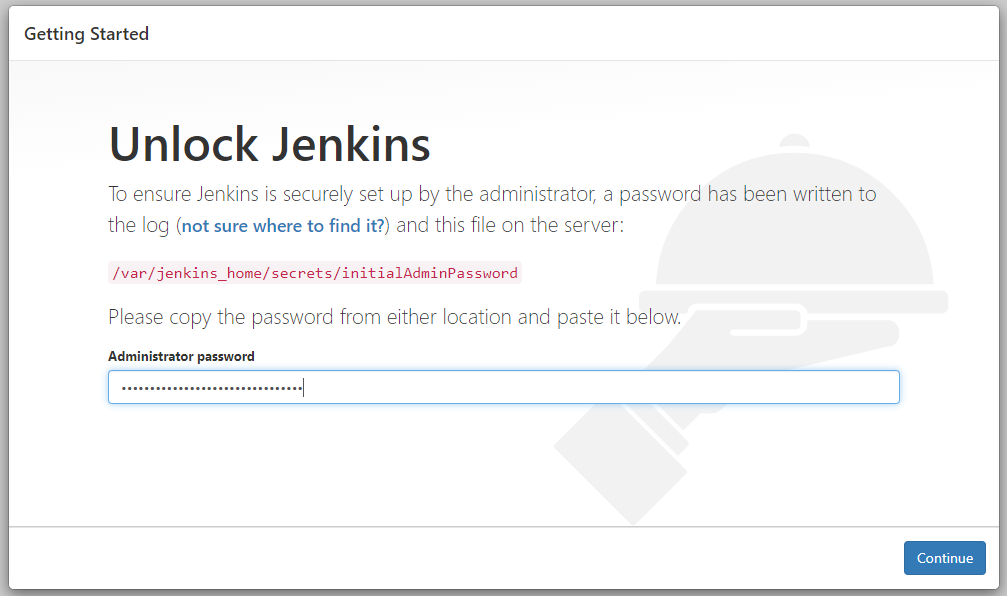

## Install the plugins

Duration: 2

Select *Install suggested plugins* option



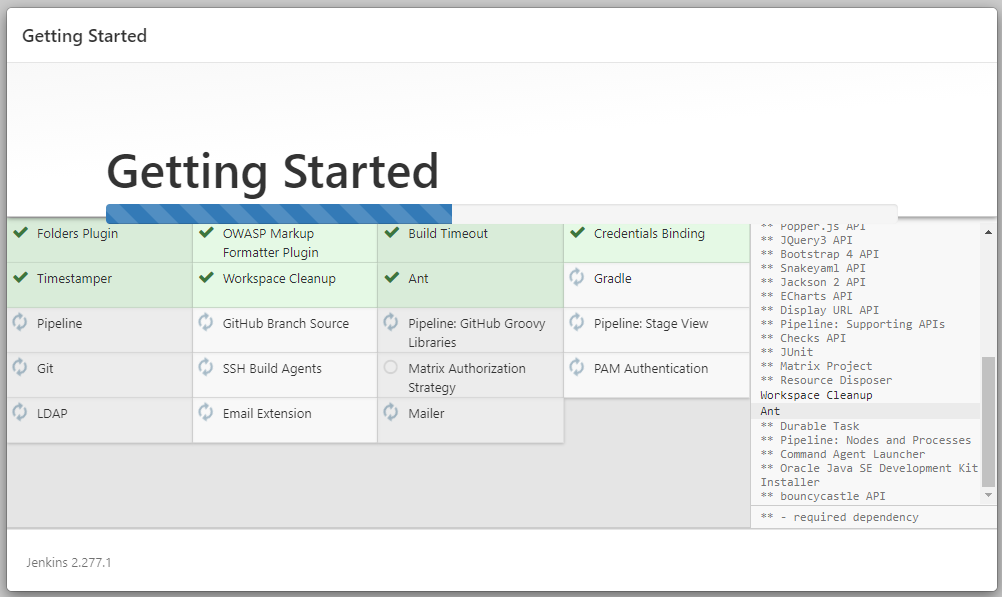

Note down the Jenkin URL: [http://ip172-18-0-30-c1d37qhbqvp000f2mu60-8080.direct.labs.play-with-docker.com/](http://ip172-18-0-30-c1d37qhbqvp000f2mu60-8080.direct.labs.play-with-docker.com/)

<!---------------------------->

## Jenkins project types

Duration: 2

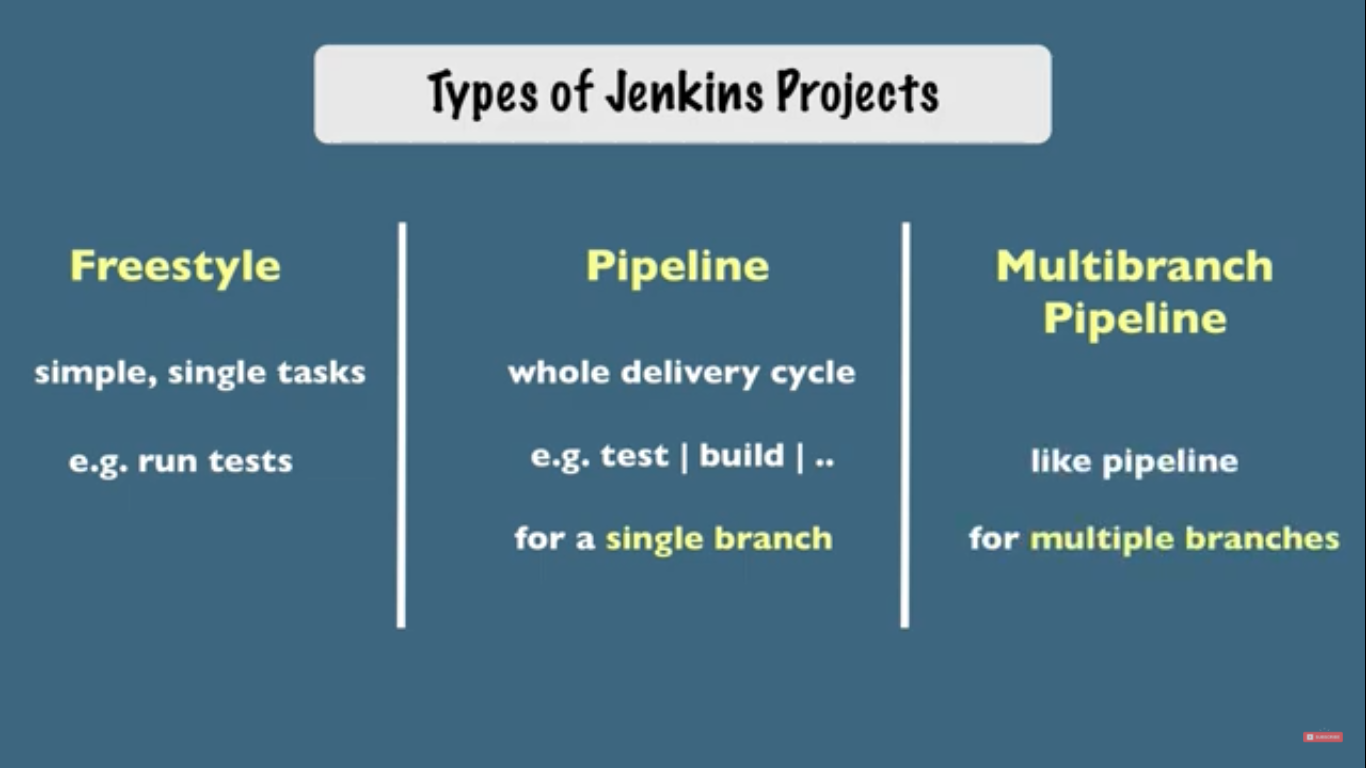

## Add global credentials

Duration: 2

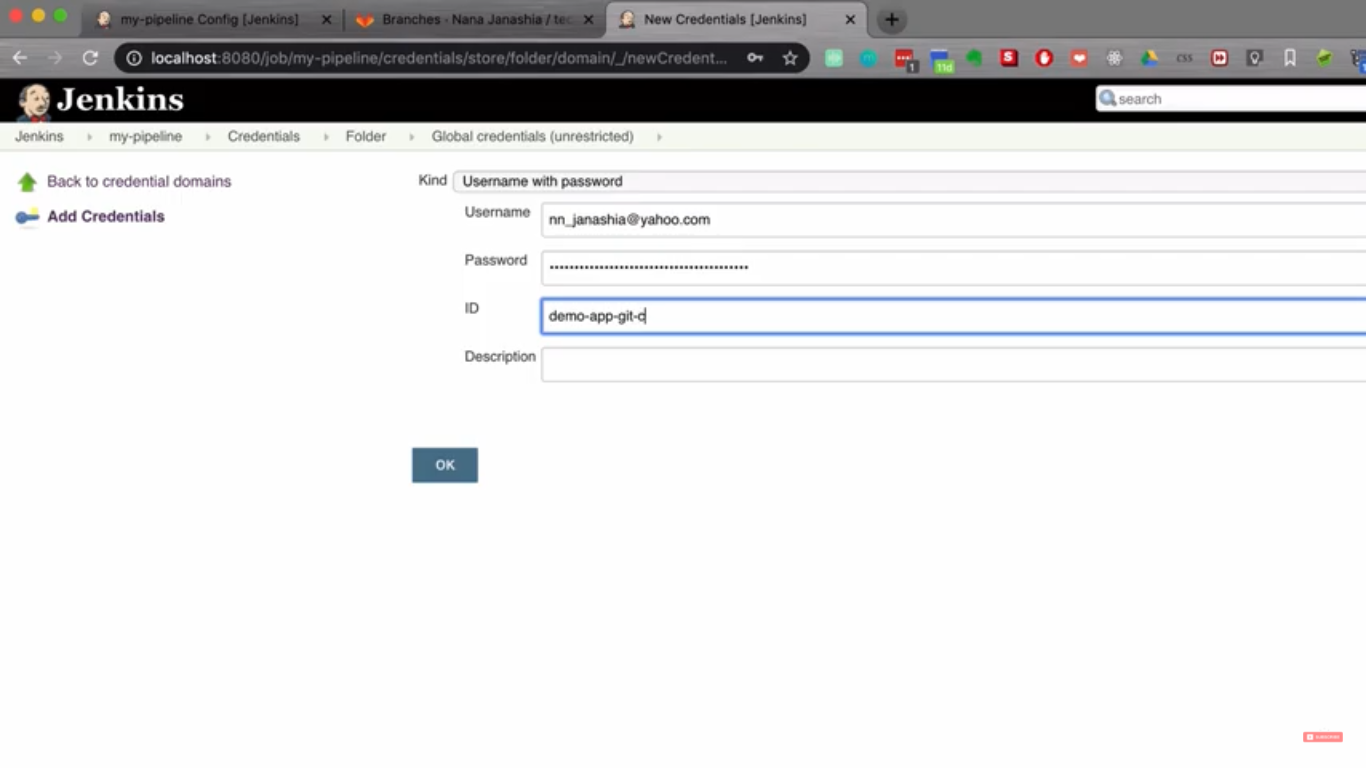

## Create a new Jenkins job

Duration: 2

Create a new job, name it and select multi-branch as type. Repo might be [https://gitlab.com/nanuchi/techworld-js-docker-demo-app/-/tree/jenkins-multi-input](https://gitlab.com/nanuchi/techworld-js-docker-demo-app/-/tree/jenkins-multi-input)

<!---------------------------->

## Add git address and credentials

Duration: 2



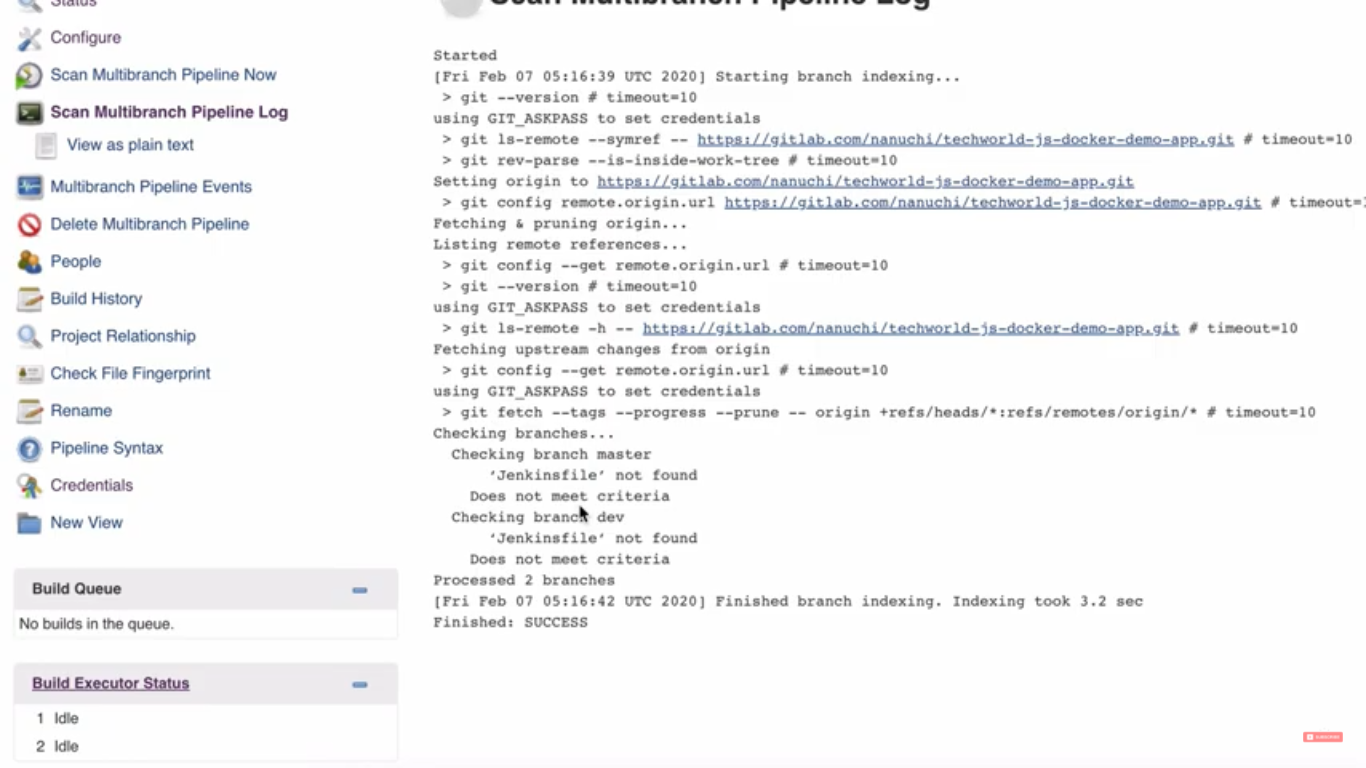

## Understand Pipeline format in Jenkinsfile

Duration: 2

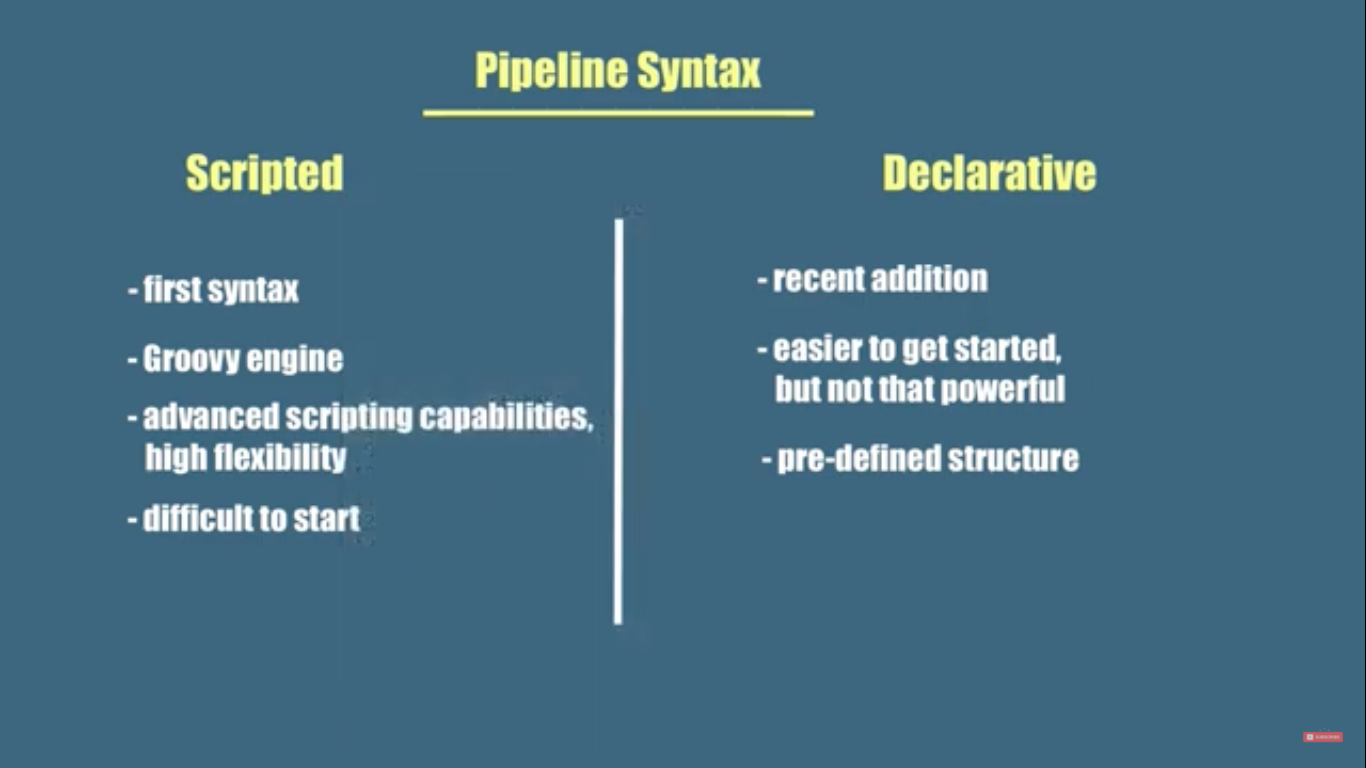

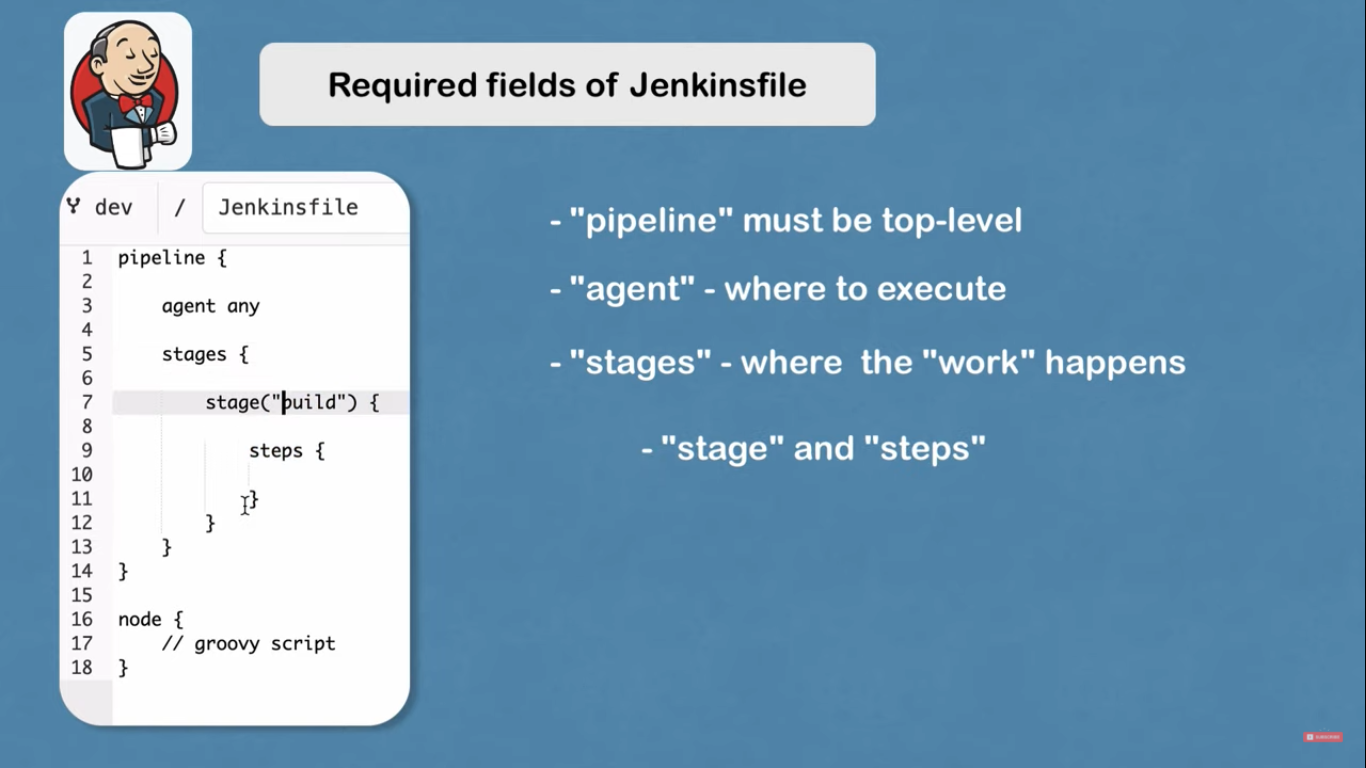

## Create Jenkinsfile

Duration: 2

```groovy
pipeline {
    agent none
    stages {
        stage('Select micro services') {
            input {
                message "Select all micro services to deploy"
                ok "All selected!"
                parameters {
                    choice(name: 'MS1', choices: ['1.1.0', '1.2.0', '1.3.0'], description: 'input ms')
                    choice(name: 'MS2', choices: ['1.1.0', '1.2.0', '1.3.0'], description: 'input ms')
                    choice(name: 'MS3', choices: ['1.1.0', '1.2.0', '1.3.0'], description: 'input ms')
                    choice(name: 'MS4', choices: ['1.1.0', '1.2.0', '1.3.0'], description: 'input ms')
                }
            }
            steps {
                script {   
                    echo "Hello, ${MS1}. Hello, ${MS2}. Hello, ${MS3}. Hello, ${MS4}"
                    MS1_TO_DEPLOY = MS1
                    MS2_TO_DEPLOY = MS2
                    env.MS3_TO_DEPLOY = MS3
                    env.MS4_TO_DEPLOY = MS4      
                }
            }
        }
        stage('Select single service') {
            input {
                message "Select single micro services to deploy?"
                parameters {
                    choice(name: 'MS5', choices: ['1.1.0', '1.2.0', '1.3.0'], description: 'second param with single option')   
                }
            }
            steps {
                script {
                    echo "Hello, ${MS5}."  
                    env.MS5_TO_DEPLOY = MS5
                    echo "${MS1_TO_DEPLOY}"
                    echo "${MS4_TO_DEPLOY}"
                    echo "${MS5_TO_DEPLOY}"  
                }
            }
        }
    }
}
```

<!---------------------------->

## Trigger the pipeline job

Duration: 2

Pipeline can be triggered either by 1) Push notifications, or 2) Polling.



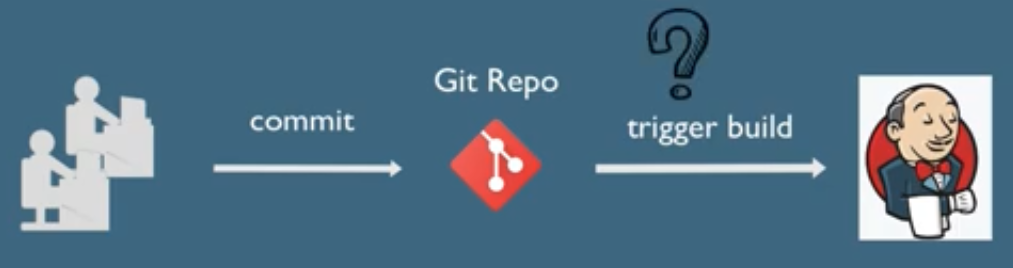

## Check out the pipeline

Duration: 2



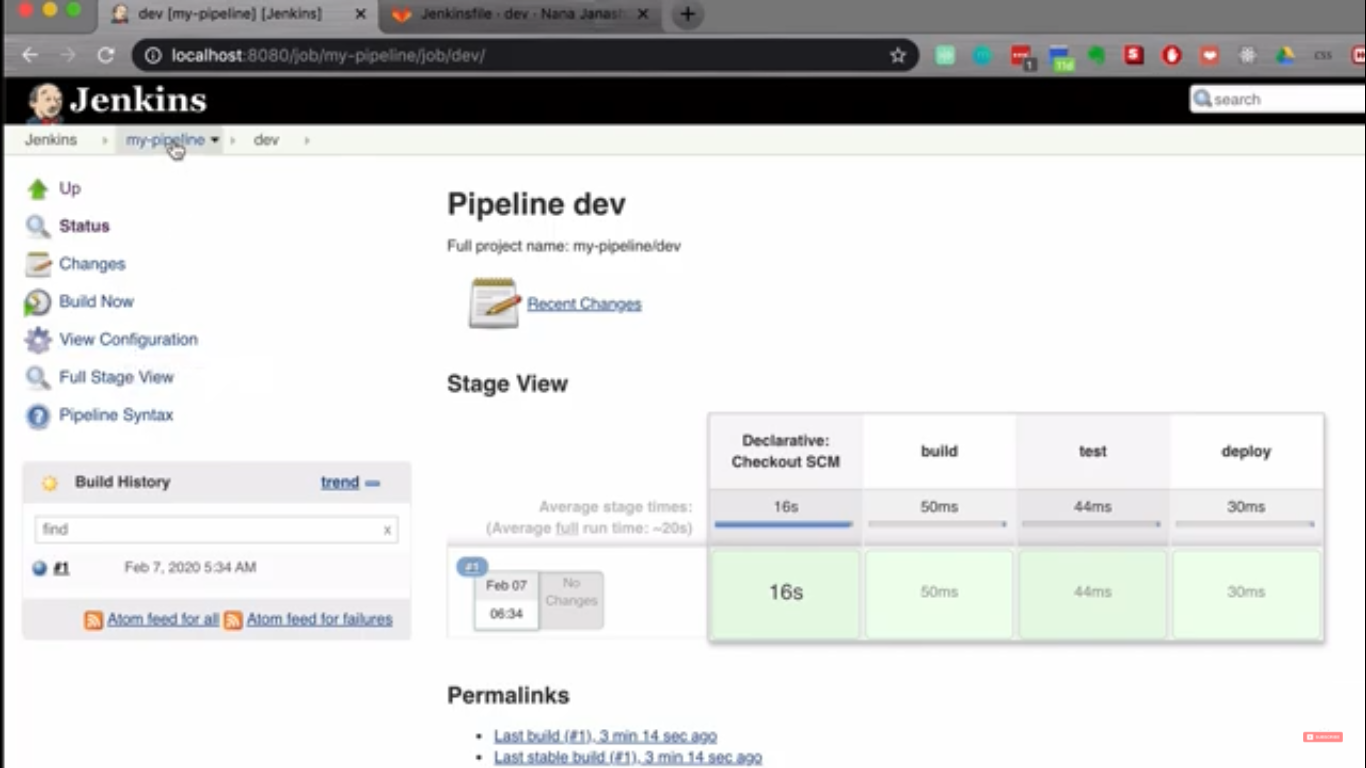

## Conclusion

Duration: 2

Congratulations!

### What we've covered

How to setup a Jenkins server to automatically run the CICD pipelines

### Links & references

1. [Jenkins Pipeline Tutorial for Beginners 1/4](https://youtu.be/pMO26j2OUME)
2. [Jenkins Pipeline Tutorial for Beginners 2/4](https://youtu.be/tuxO7ZXplRE)
3. [Jenkins Pipeline Tutorial for Beginners 3/4](https://youtu.be/MY1w7sWW5ms)
4. [Jenkins Pipeline Tutorial for Beginners 4/4](https://youtu.be/CmwTPxdx24Y)
5. [Complete Jenkins Pipeline Tutorial | Jenkinsfile explained](https://youtu.be/7KCS70sCoK0)